## **STOCH (Stochastic Oscillator):**
   - *__Purpose__*: The Stochastic Oscillator helps identify overbought or oversold conditions based on recent price movements.
   - *__Activation and Usage__*: Use the `talib.STOCH` function in Python. It generates %K and %D values.
   - *__Strategy__*: %K crossing above/below %D can signal potential trend reversals.
   - *__Key Points__*: Look for divergences between %K/%D and price trends for potential reversals.
   - *__Effective Conditions__*: STOCH is useful in range-bound markets to identify overbought/oversold levels.

In [2]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.STOCH.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 STOCH(high, low, close[, fastk_period=?, slowk_period=?, slowk_matype=?, slowd_period=?, slowd_matype=?])

    Stochastic (Momentum Indicators)

    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        fastk_period: 5
        slowk_period: 3
        slowk_matype: 0
        slowd_period: 3
        slowd_matype: 0
    Outputs:
        slowk
        slowd
    


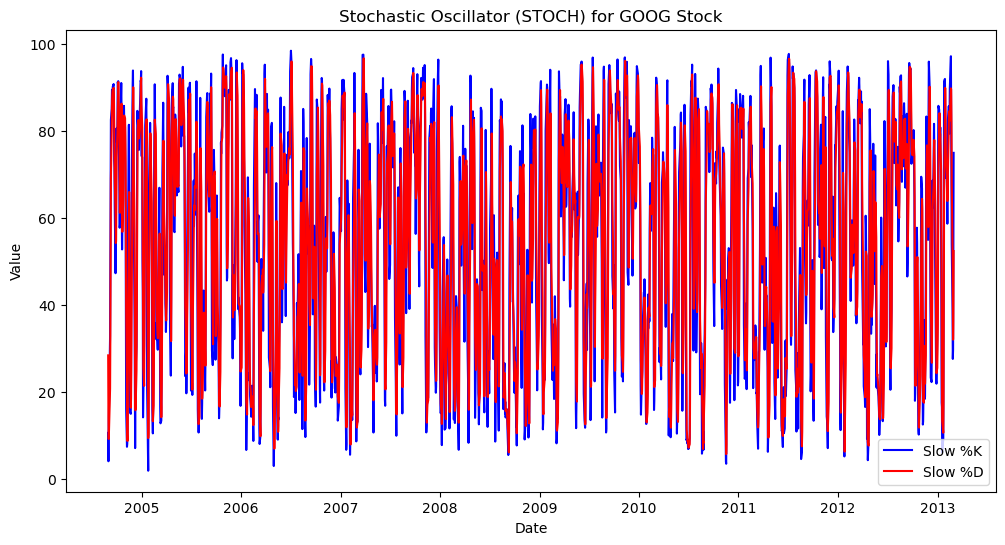

In [3]:
fastk_period = 5
slowk_period = 3
slowk_matype = 0
slowd_period = 3
slowd_matype = 0
high_prices = GOOG['High']
low_prices = GOOG['Low']
close_prices = GOOG['Close']

# Calculate the Stochastic Oscillator (STOCH)
slowk, slowd = talib.STOCH(high_prices, low_prices, close_prices,
                           fastk_period=fastk_period, slowk_period=slowk_period,
                           slowk_matype=slowk_matype, slowd_period=slowd_period,
                           slowd_matype=slowd_matype)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Slow %K and Slow %D
plt.plot(GOOG.index, slowk, label='Slow %K', color='blue')
plt.plot(GOOG.index, slowd, label='Slow %D', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('Stochastic Oscillator (STOCH) for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [7]:
class StochOscillatorStrategy(Strategy):
    fastk_period = 5
    slowk_period = 3
    slowk_matype = 0
    slowd_period = 3
    slowd_matype = 0

    def init(self):
        self.slowk, self.slowd = self.I(talib.STOCH, GOOG['High'], GOOG['Low'], GOOG['Close']
                                        ,self.fastk_period ,self.slowk_period,self.slowk_matype,self.slowd_period,self.slowd_matype)

    def next(self):
        if self.slowk[-1] > self.slowd[-1] and self.slowk[-2] <= self.slowd[-2]:
            if not self.position:
                self.buy()
        elif self.slowk[-1] < self.slowd[-1] and self.slowk[-2] >= self.slowd[-2]:
            if self.position:
                self.position.close()

bt = Backtest(GOOG, StochOscillatorStrategy, cash=10_000)
stats = bt.run()
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   61.824953
Equity Final [$]                     49858.01
Equity Peak [$]                      57839.13
Return [%]                           398.5801
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   20.741668
Volatility (Ann.) [%]               28.416239
Sharpe Ratio                         0.729923
Sortino Ratio                         1.39802
Calmar Ratio                         0.491036
Max. Drawdown [%]                   -42.24063
Avg. Drawdown [%]                   -3.909263
Max. Drawdown Duration      868 days 00:00:00
Avg. Drawdown Duration       51 days 00:00:00
# Trades                                  288
Win Rate [%]                        54.513889
Best Trade [%]                      20.496894
Worst Trade [%]                    -12.625431
Avg. Trade [%]                    

In [8]:
def optim_func(series):
    if series['# Trades'] < 15:
        return -1
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 

bt = Backtest(GOOG, StochOscillatorStrategy, cash=10_000)
stats = bt.optimize(
    fastk_period = range(3,7,1),
    slowk_period = range(0,5,1),
    slowk_matype = range(0,5,1),
    slowd_period = range(0,5,1),
    slowd_matype = range(0,5,1),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)

RuntimeError: Indicator "STOCH(H,L,C,3,0,3,4,2)" errored with exception: TA_STOCH function failed with error code 2: Bad Parameter (TA_BAD_PARAM)